In [4]:
import pandas as pd

# Load the dataset
data_path = 'updated_data.csv'
data = pd.read_csv(data_path)

    # Display the first few rows of the dataset and the summary of the data
data.head(), data.info(), data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

(   valence  year  acousticness  \
 0   0.0594  1921         0.982   
 1   0.9630  1921         0.732   
 2   0.0394  1921         0.961   
 3   0.1650  1921         0.967   
 4   0.2530  1921         0.957   
 
                                              artists  danceability  \
 0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
 1                                     ['Dennis Day']         0.819   
 2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
 3                                   ['Frank Parker']         0.275   
 4                                     ['Phil Regan']         0.418   
 
    duration_ms  energy  explicit                      id  instrumentalness  \
 0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
 1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
 2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
 3       210000   0.309         0  3ftBPsC5v

In [5]:
data.shape

(170653, 20)

In [6]:
# Checking for missing values and duplicates
missing_values = data.isnull().sum()
duplicates = data.duplicated().sum()

missing_values, duplicates, data.isna().sum()


(valence             0
 year                0
 acousticness        0
 artists             0
 danceability        0
 duration_ms         0
 energy              0
 explicit            0
 id                  0
 instrumentalness    0
 key                 0
 liveness            0
 loudness            0
 mode                0
 name                0
 popularity          0
 release_date        0
 speechiness         0
 tempo               0
 mood                0
 dtype: int64,
 0,
 valence             0
 year                0
 acousticness        0
 artists             0
 danceability        0
 duration_ms         0
 energy              0
 explicit            0
 id                  0
 instrumentalness    0
 key                 0
 liveness            0
 loudness            0
 mode                0
 name                0
 popularity          0
 release_date        0
 speechiness         0
 tempo               0
 mood                0
 dtype: int64)

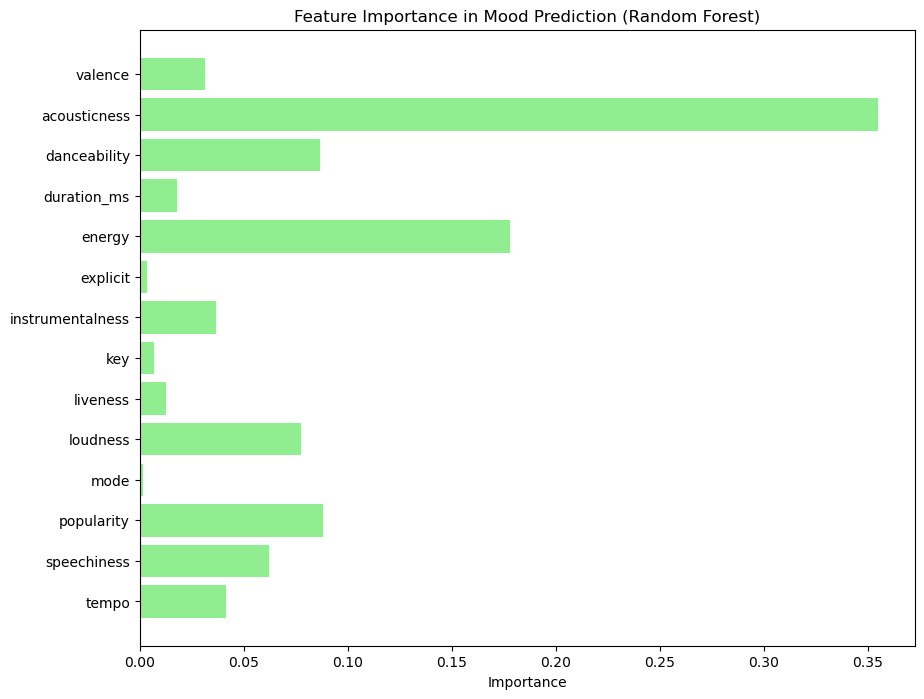

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt


data_df = pd.read_csv(data_path)
# Encoding the 'mood' column
le = LabelEncoder()
data_df['mood_encoded'] = le.fit_transform(data_df['mood'])

# Selecting features and target
features = data_df.select_dtypes(include=['int64', 'float64']).columns.drop(['mood_encoded', 'year'])
X = data_df[features]
y = data_df['mood_encoded']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)


# Feature importance from Random Forest
feature_importance_rf = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
})

# Plotting feature importance from Random Forest
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.title('Feature Importance in Mood Prediction (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

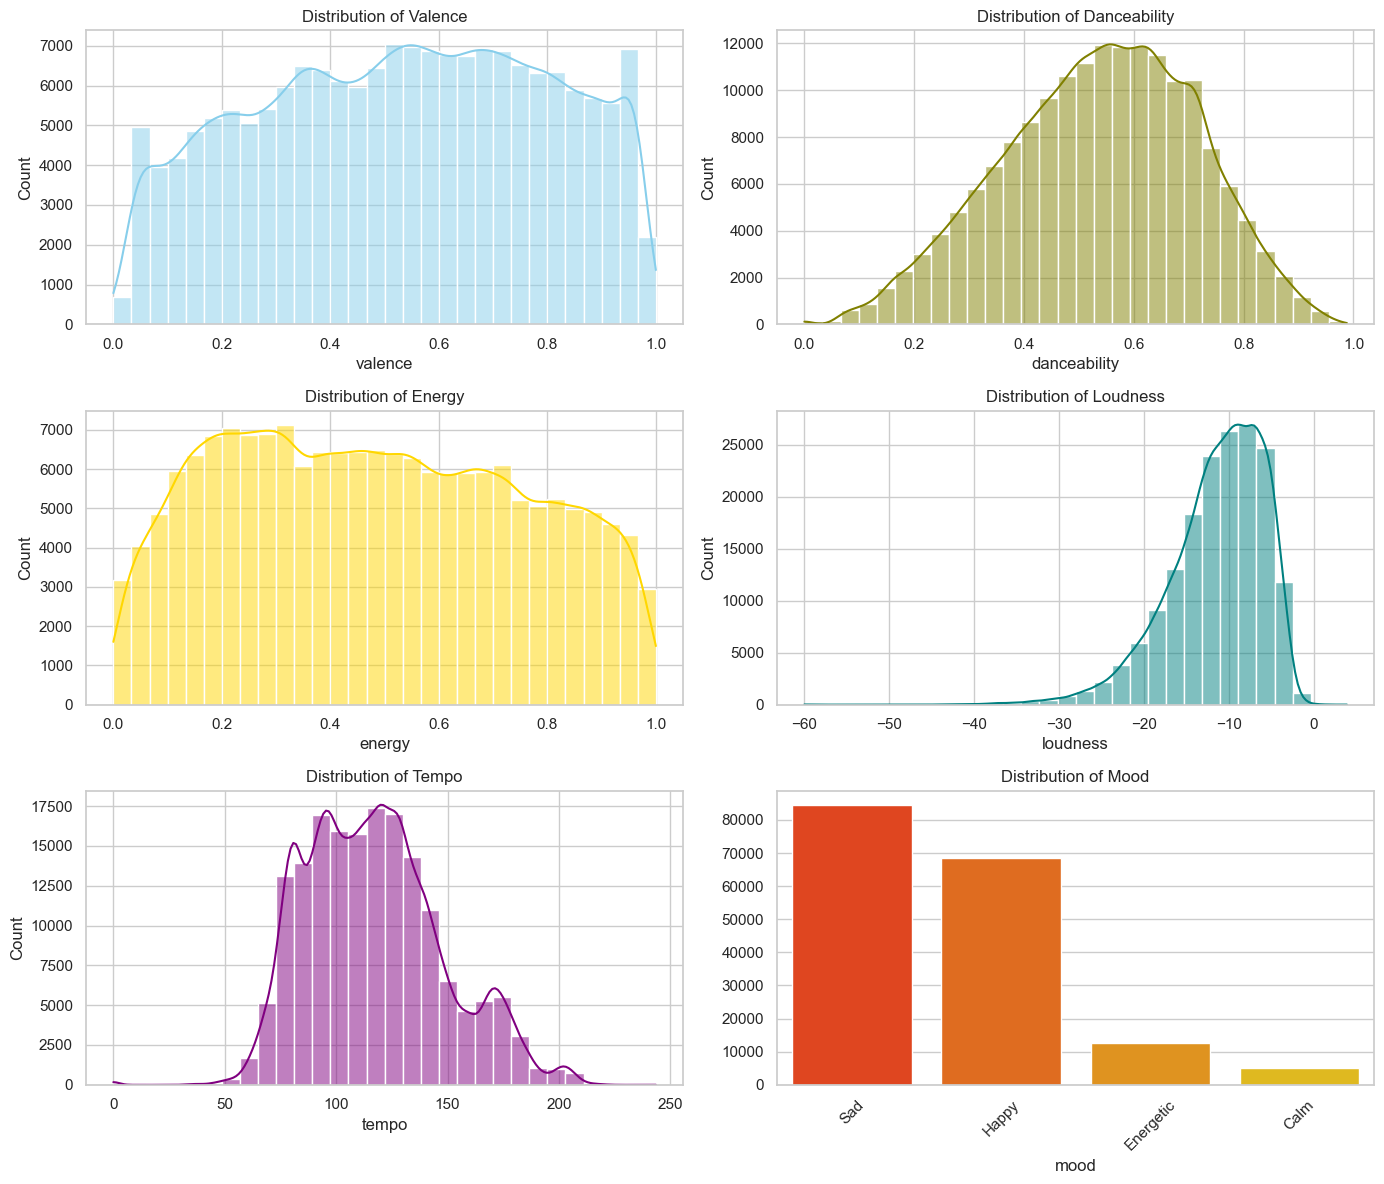

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Plot distributions of various features
sns.histplot(data['valence'], ax=axes[0, 0], bins=30, kde=True, color='skyblue')
axes[0, 0].set_title('Distribution of Valence')

sns.histplot(data['danceability'], ax=axes[0, 1], bins=30, kde=True, color='olive')
axes[0, 1].set_title('Distribution of Danceability')

sns.histplot(data['energy'], ax=axes[1, 0], bins=30, kde=True, color='gold')
axes[1, 0].set_title('Distribution of Energy')

sns.histplot(data['loudness'], ax=axes[1, 1], bins=30, kde=True, color='teal')
axes[1, 1].set_title('Distribution of Loudness')

sns.histplot(data['tempo'], ax=axes[2, 0], bins=30, kde=True, color='purple')
axes[2, 0].set_title('Distribution of Tempo')

# Plot mood distribution
mood_counts = data['mood'].value_counts()
sns.barplot(x=mood_counts.index, y=mood_counts.values, ax=axes[2, 1], palette='autumn')
axes[2, 1].set_title('Distribution of Mood')
axes[2, 1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Label encoding for 'mood'
label_encoder = LabelEncoder()
data['mood_encoded'] = label_encoder.fit_transform(data['mood'])

# Features to scale
features_to_scale = ['loudness', 'tempo']
scaler = StandardScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Features for the model
feature_columns = ['valence', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness',
                   'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[feature_columns], data['mood_encoded'], test_size=0.2, random_state=42)

X_train.head(), y_train.head()


(        valence  acousticness  danceability  duration_ms  energy  \
 112871    0.831        0.8520         0.536       133640   0.958   
 149205    0.850        0.3170         0.688       149973   0.596   
 15097     0.194        0.0377         0.252       387213   0.849   
 130690    0.613        0.2560         0.576       155027   0.719   
 169206    0.472        0.0484         0.492       221392   0.846   
 
         instrumentalness  key  liveness  loudness  mode  popularity  \
 112871          0.025300    4    0.8330  0.825035     1          19   
 149205          0.000000    7    0.0717  0.263427     1          26   
 15097           0.005920    5    0.0545  0.871719     1          67   
 130690          0.000446    8    0.1320  0.532824     1          26   
 169206          0.000125    0    0.0768  0.765891     1          45   
 
         speechiness     tempo  
 112871       0.0387 -0.804651  
 149205       0.0343  0.834279  
 15097        0.0581  1.525392  
 130690       0.05

In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


# Step 1: Drop the specified columns'
dataframe =  pd.read_csv(data_path)
dataframe.head()
columns_to_drop = ['name', 'artists', 'id', 'key', 'release_date']
dataframe = dataframe.drop(columns=columns_to_drop)

# Step 3: Standardize all the numerical columns
numerical_cols = dataframe.select_dtypes(include=['float64', 'int64']).columns.tolist()
scaler = StandardScaler()
dataframe[numerical_cols] = scaler.fit_transform(dataframe[numerical_cols])

# Step 4: Label encode the 'mood' column
label_encoder = LabelEncoder()
dataframe['mood_encoded'] = label_encoder.fit_transform(dataframe['mood'])

# Extract features and target
X= dataframe.drop(columns=['mood', 'mood_encoded'])
y = dataframe['mood_encoded']

# Split data into training, evaluation, and testing sets (70-10-20 split)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_eval, X_test, y_eval, y_test = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)

# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SGD Classifier": SGDClassifier(random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGB Classifier": xgb.XGBClassifier(use_label_encoder=True, eval_metric="mlogloss", random_state=42),
    "SVM Linear": SVC(kernel="linear", random_state=42),
    "SVM Polynomial": SVC(kernel="poly", random_state=42),
    "SVM RBF": SVC(kernel="rbf", random_state=42),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the evaluation set
    y_pred = model.predict(X_test)
    
    # Record the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    
    results[name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}

results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.795872,0.783931,0.795872,0.783878
SGD Classifier,0.782491,0.750137,0.782491,0.751656
Gaussian Naive Bayes,0.771821,0.798968,0.771821,0.781416
Decision Tree,0.999708,0.999709,0.999708,0.999708
Random Forest,0.999271,0.999272,0.999271,0.999271
XGB Classifier,0.998863,0.998863,0.998863,0.998863
SVM Linear,0.801790,0.791010,0.801790,0.788415
SVM Polynomial,0.854790,0.855855,0.854790,0.850849
SVM RBF,0.886537,0.887359,0.886537,0.885141
KNN,0.845199,0.846421,0.845199,0.844788


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predicting the testing set
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
report_rf = classification_report(y_test, y_pred_rf)

accuracy_rf, precision_rf, recall_rf, f1_rf, report_rf


(0.969060384987255,
 0.9541111207961972,
 0.9450553881576126,
 0.9493822608485061,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       951\n           1       0.87      0.82      0.84      2496\n           2       0.96      0.98      0.97     13785\n           3       0.99      0.98      0.98     16899\n\n    accuracy                           0.97     34131\n   macro avg       0.95      0.95      0.95     34131\nweighted avg       0.97      0.97      0.97     34131\n')

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting the test set
predictions = rf_model.predict(X_test)

# Calculate and display performance metrics
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.05440801617298058
R^2 Score: 0.900270230802046


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       951
           1       0.87      0.82      0.84      2496
           2       0.96      0.98      0.97     13785
           3       0.99      0.98      0.98     16899

    accuracy                           0.97     34131
   macro avg       0.95      0.95      0.95     34131
weighted avg       0.97      0.97      0.97     34131



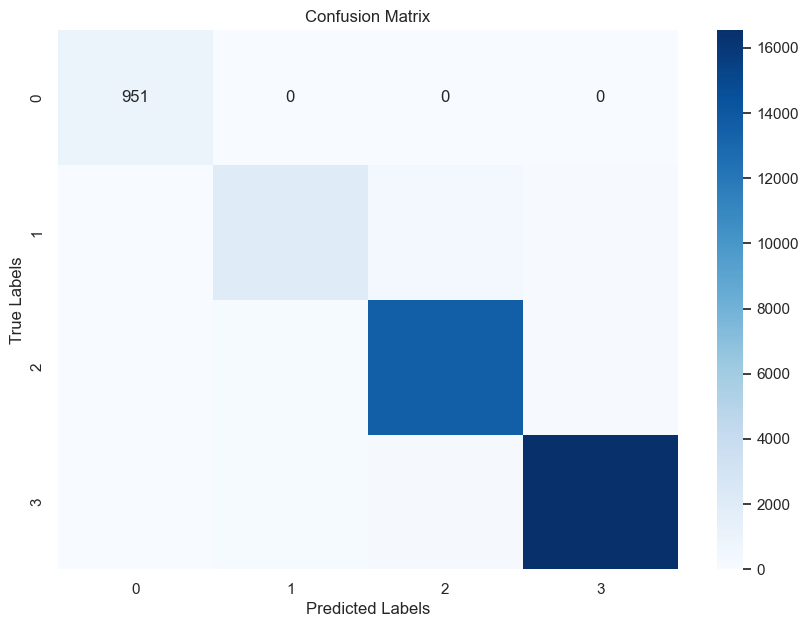

In [13]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
predictions = rf_model.predict(X_test)

# Evaluation
print(classification_report(y_test, predictions))

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [14]:
list(label_encoder.classes_)

['Calm', 'Energetic', 'Happy', 'Sad']

In [15]:


# Predict moods for all songs using the trained Random Forest model
all_moods_predicted = rf_model.predict(data[feature_columns])

# Filter songs that are predicted to be 'Happy' using the corrected encoded value
happy_songs_indices_correct = (all_moods_predicted == 0)
happy_songs_correct = data[happy_songs_indices_correct]

# Selecting a few attributes to display for the happy songs
happy_songs_sample_correct = happy_songs_correct[['artists', 'name', 'year', 'mood']].sample(n=20, random_state=42)  # Display  random happy songs
happy_songs_sample_correct

,artists,name,year,mood
153520,['Daft Punk'],Nocturne,2010,Calm
48371,['Michael Jackson'],One Day In Your Life,1975,Calm
158050,['Nelson Riddle'],I Get Along Without You Very Well,1957,Calm
150839,['Jimmy Smith'],Ode To Billie Joe,1996,Calm
8875,['Dusty Springfield'],You Don't Have To Say You Love Me,1966,Calm
26840,['Ramsey Lewis Trio'],Winter Wonderland,1961,Calm
84191,['Eagles'],Teenage Jail - 2013 Remaster,1979,Calm
6532,['Dizzy Gillespie'],Rhumba-Finale,1954,Calm
28444,['Led Zeppelin'],What Is and What Should Never Be - Remaster,1969,Calm
41570,['Sreenanda Mukherjee'],Amar Nishithrater Badal Dhara,1941,Calm


In [16]:
import joblib

# Paths for the model and label encoder
model_path = 'random_forest_music_model.joblib'
label_encoder_path = 'label_encoder.joblib'

# Save the model
joblib.dump(rf_model, model_path)

# Save the label encoder
joblib.dump(label_encoder, label_encoder_path)

model_path, label_encoder_path


('random_forest_music_model.joblib', 'label_encoder.joblib')

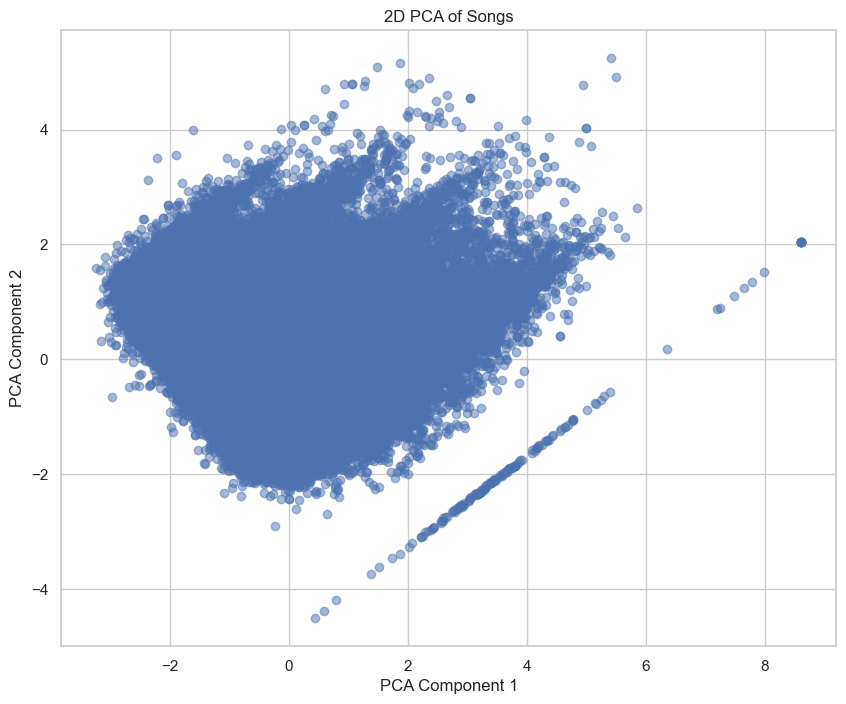

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
features = data[['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'tempo']]

# Reducing the dimensionality of the features
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], alpha=0.5)
plt.title('2D PCA of Songs')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [50]:
from sklearn.metrics.pairwise import cosine_similarity

# Select a random song from the dataset
random_song = data.sample(random_state=90)

# Display the selected song's details
random_song[['artists', 'name', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'tempo']]

random_song


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,mood,mood_encoded
18887,0.405,2016,0.0137,['Panic! At The Disco'],0.462,203507,0.538,0,1BECwm5qkaBwlbfo4kpYx8,0.0,...,0.429,1.042658,1,Death of a Bachelor,72,2016-01-15,0.059,0.729259,Energetic,1


In [51]:
# Filter out the selected song from the dataset for comparison
songs_to_compare = data.drop(random_song.index)

# Calculate the cosine similarity between the selected song and all other songs
similarities = cosine_similarity(
    songs_to_compare[['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'tempo']],
    random_song[['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'tempo']]
)

# Add similarity scores to the songs_to_compare dataframe
songs_to_compare['similarity'] = similarities

# Sort songs by similarity score, highest first
top_recommendations = songs_to_compare.sort_values(by='similarity', ascending=False).head(5)

## Combine the selected song with the top recommendations for comparison
comparison_data = pd.concat([random_song, top_recommendations])

# Labels for the songs
song_labels = ['Selected Song'] + [f"Recommendation {i+1}" for i in range(len(top_recommendations))]

# Display the selected song's details
top_recommendations[['artists', 'name', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'tempo', 'similarity']]

,artists,name,acousticness,danceability,energy,instrumentalness,loudness,tempo,similarity
105080,['Michael Learns To Rock'],Paint My Love - 2002 Digital Remaster,0.0186,0.571,0.622,0.000004,1.232201,0.820244,0.999616
154739,['BANNERS'],Start A Riot,0.0135,0.535,0.728,0.000000,1.309247,0.884461,0.999145
124926,"['Rvssian', 'Lil Mosey', 'Lil Tjay']",Only The Team (with Lil Mosey & Lil Tjay),0.0178,0.764,0.774,0.000000,1.508793,1.077567,0.999128
138906,['Gucci Mane'],Making Love to the Money,0.0160,0.629,0.729,0.000000,1.276779,0.915983,0.999094
89414,['The Red Jumpsuit Apparatus'],Cat And Mouse,0.0157,0.466,0.653,0.000000,1.208333,0.852287,0.998995


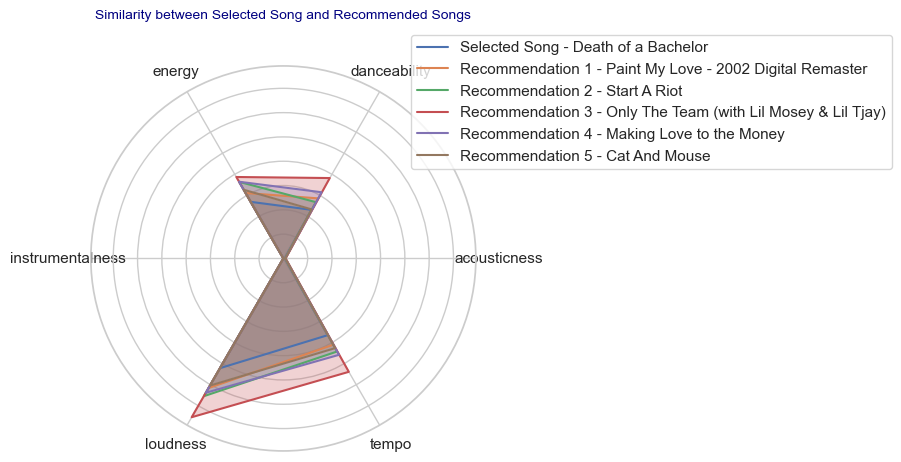

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Create a radar chart to visualize the similarities with song names as labels
def create_radar_chart_with_names(df, song_labels):
    # Number of variables
    categories = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'tempo']
    N = len(categories)

    # What will be the angle of each axis in the plot
    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()

    # The plot is a circle, so we need to "complete the loop"
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))

    for idx, row in df.iterrows():
        values = row[categories].tolist()
        values += values[:1]
        ax.fill(angles, values, alpha=0.25)
        ax.plot(angles, values, label=song_labels[idx])

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    plt.legend(loc='upper right', bbox_to_anchor=(2.1, 1.1))
    plt.title('Similarity between Selected Song and Recommended Songs', size=10, color='navy', y=1.1)
    plt.show()

# Labels for the songs with names
song_labels_with_names = ['Selected Song - ' + random_song.iloc[0]['name']] + [f"Recommendation {i+1} - " + name for i, name in enumerate(top_recommendations['name'].tolist())]

# Ensure the length of labels matches the number of rows in the comparison data
if len(song_labels_with_names) > len(comparison_data):
    song_labels_with_names = song_labels_with_names[:len(comparison_data)]
elif len(song_labels_with_names) < len(comparison_data):
    song_labels_with_names += [''] * (len(comparison_data) - len(song_labels_with_names))

# Reset the index of comparison_data to ensure a proper match with song_labels
comparison_data.reset_index(drop=True, inplace=True)

# Create a radar chart with the corrected song labels
create_radar_chart_with_names(comparison_data, song_labels_with_names)


In [ ]:
# from sklearn.neighbors import NearestNeighbors
# import numpy as np

# selected_tracks = data.tail(10)
# selected_tracks
# average_features = selected_tracks[['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']].mean()

# # Selecting features to use for the similarity calculation
# feature_columns = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']
# features = data[feature_columns]

# # Using NearestNeighbors to find the closest tracks
# nn_model = NearestNeighbors(n_neighbors=5, metric='euclidean')
# nn_model.fit(features)

# # Predict the nearest neighbors for the average feature set of the selected tracks
# average_features_reshaped = np.array(average_features).reshape(1, -1)
# distances, indices = nn_model.kneighbors(average_features_reshaped)

# # Getting the recommended track details
# recommended_tracks = data.iloc[indices[0]]
# recommended_tracks[['name', 'artists', 'year', 'mood']]
